# gpt-41 in AzureAI Foundry

<img src="https://azure.microsoft.com/en-us/blog/wp-content/uploads/2025/04/90e545fa-57c0-45bc-bcdd-b865918b886f-1024x576.webp">

> https://azure.microsoft.com/en-us/blog/announcing-the-gpt-4-1-model-series-for-azure-ai-foundry-developers/?msockid=2e39c66c693c66a5151fd200687567d0

In [1]:
import base64
import os
import sys

from datetime import datetime
from dotenv import load_dotenv
from openai import AzureOpenAI
from PIL import Image

In [2]:
sys.version

'3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]'

In [3]:
print(f"Today is {datetime.today().strftime('%d-%b-%Y %H:%M:%S')}")

Today is 20-Jun-2025 16:37:44


In [4]:
print('OK') if load_dotenv("azure.env") else print('ERROR: Check file location or name.')

OK


In [6]:
model_name = "gpt-4.1"
deployment = "gpt-4.1"

api_version = "2025-01-01-preview"

In [7]:
client = AzureOpenAI(
    api_version=api_version,
    azure_endpoint=os.getenv("endpoint"),
    api_key=os.getenv("key"),
)

In [8]:
response = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant.",
        },
        {
            "role": "user",
            "content": "I am going to Paris, what should I see?",
        }
    ],
    max_completion_tokens=800,
    temperature=1.0,
    top_p=1.0,
    frequency_penalty=0.0,
    presence_penalty=0.0,
    model=deployment
)

print(response.choices[0].message.content)

How exciting! Paris is full of incredible sights, experiences, and hidden gems. Here are some must-sees and recommendations for your visit:

### The Essentials
- **Eiffel Tower**: Visit during the day and at night when it’s beautifully illuminated.
- **Louvre Museum**: Home to the Mona Lisa and countless masterpieces (tip: consider booking a timed entry ticket).
- **Notre-Dame Cathedral**: While repairs continue after the 2019 fire, you can still admire it from the outside and explore the Ile de la Cité.
- **Sainte-Chapelle**: Famous for its stunning stained-glass windows, also on Ile de la Cité.
- **Musée d’Orsay**: Renowned for its Impressionist and Post-Impressionist art collection.
- **Arc de Triomphe & Champs-Élysées**: Climb to the top of the Arc for panoramic city views.
- **Montmartre and Sacré-Cœur**: Wander the charming streets, see the iconic basilica, and enjoy the artist atmosphere.

### Local Experiences
- **Le Marais**: Trendy neighborhood with boutique shops, Jewish her

## Analysing an image file

In [9]:
prompt = "What is the total amount? What are the date and the order id?"

image_url = "https://templates.invoicehome.com/modele-facture-fr-pur-750px.png"

In [10]:
response = client.chat.completions.create(
    model=deployment,
    messages=[
        {
            "role": "system",
            "content": "You are an AI helpful assistant."
        },
        {
            "role":
            "user",
            "content": [{
                "type": "text",
                "text": prompt,
            }, {
                "type": "image_url",
                "image_url": {
                    "url": image_url,
                },
            }]
        },
    ],
)

print(response.choices[0].message.content)

Here are the details from the invoice:

- **Total amount:** 174.00 €
- **Date:** 29/01/2019
- **Order ID (Commande N°):** 1630/2019


In [11]:
prompt = "You can see two images here. One on the left and one on the right. What are the differences between them?"
image_url = "https://img.jagranjosh.com/images/2023/February/1822023/Spot-5-Differences-in-13-Seconds.jpg"

In [12]:
response = client.chat.completions.create(
    model=deployment,
    messages=[
        {
            "role": "system",
            "content": "You are an AI helpful assistant."
        },
        {
            "role":
            "user",
            "content": [{
                "type": "text",
                "text": prompt,
            }, {
                "type": "image_url",
                "image_url": {
                    "url": image_url,
                },
            }]
        },
    ],
)

print(response.choices[0].message.content)

Here are the differences between the two images (excluding the blurred face):

1. Buildings: The right image has buildings in the background behind the bench, while the left image does not.
2. Frisbee Color: The frisbee on the left is red with a green streak, whereas on the right it is fully red.
3. Kite: The kite in the left image is purple, while in the right image it is red.
4. Bird: There is a blue bird on a branch in the bottom left of both images, but the left image also has a nest and eggs, while the right does not.
5. Duck/Fish: The left image has a yellow duck in the pond, while the right image has an orange fish.


In [13]:
prompt = "Describe this image"
image_url = "https://th.bing.com/th/id/OIP.ej866IJVOtDRhQD65TdhYQHaDi?rs=1&pid=ImgDetMain"

In [14]:
response = client.chat.completions.create(
    model=deployment,
    messages=[
        {
            "role": "system",
            "content": "You are an AI helpful assistant."
        },
        {
            "role":
            "user",
            "content": [{
                "type": "text",
                "text": prompt,
            }, {
                "type": "image_url",
                "image_url": {
                    "url": image_url,
                },
            }],
        },
    ],
)

print(response.choices[0].message.content)

This image is Charles Joseph Minard's famous **"Carte Figurative"** (1869), a flow map that dramatically visualizes the catastrophic losses suffered by Napoleon's Grand Army during the **1812 Russian campaign**.

Here’s a detailed description:

**1. Main Visual Elements:**
- **Thick tan band (left to right):** This shows the size of Napoleon’s army as it invaded Russia, starting on the left with about 422,000 men at the Neman River.
- **Band narrows:** As the army advanced towards Moscow (right), the width narrows sharply, symbolizing losses from battle, starvation, and cold.
- **Black band (right to left):** The return march from Moscow is depicted by a black band, continuing to thin drastically as the army retreats.
- **Numbers:** At various points, the number of surviving troops is noted.

**2. Geographic Context:**
- The path of the campaign is mapped with key cities labeled: Kowno, Vilna, Smolensk, Moscow, etc.
- Rivers and major waypoints are noted.

**3. Temperature Graph:**
- A

## Using a local image

In [15]:
def gpt41_imagefile(prompt, image_file):
    """
    Analyzing a local image file with gpt4.1
    """
    client = AzureOpenAI(
        api_version=api_version,
        azure_endpoint=os.getenv("endpoint"),
        api_key=os.getenv("key"),
    )
    
    # Transforming local image to base64
    with open(image_file, "rb") as image_file:
        base64_image = base64.b64encode(image_file.read()).decode('utf-8')

    # link to base64
    image_uri = f"data:image/jpeg;base64,{base64_image}"

    # Results
    response = client.chat.completions.create(
        model=deployment,
        messages=[
            {
                "role": "system",
                "content": "You are an AI helpful assistant that is analyzing images."
            },
            {
                "role":
                "user",
                "content": [{
                    "type": "text",
                    "text": prompt,
                }, {
                    "type": "image_url",
                    "image_url": {
                        "url": image_uri,
                    },
                }]
            },
        ],
        max_tokens=800,
        temperature=0.,
    )

    return response.choices[0].message.content

In [16]:
prompt = "How many rooms? How many bedrooms? How many doors and windows?"

image_path = "plan.jpg"

img = Image.open(image_path)
img

In [17]:
res = gpt41_imagefile(prompt, image_path)
print(res)

Here is the analysis based on the floor plan:

**Number of rooms:**
- Entrée (Entrance)
- Cuisine (Kitchen)
- Séjour (Living/Dining Room)
- SdB (Bathroom)
- WC (Toilet)
- Couloir (Hallway)
- Chambre (Bedroom) 1
- Chambre (Bedroom) 2
- Chambre (Bedroom) 3
- Dressing (Walk-in Closet)

**Total rooms:** 10 (if you count all labeled spaces, including the hallway and dressing)

**Number of bedrooms:** 3 (all labeled "Chambre")

---

**Number of doors:**
- Entrance door: 1
- Kitchen to Séjour: 1
- Séjour to hallway: 1
- Hallway to each bedroom: 3
- Hallway to bathroom: 1
- Hallway to WC: 1
- Bedroom to dressing: 1
- Each bedroom to outside (if you count terrace doors): 1 (for the bedroom with direct access)
- Séjour to terrace: 1

**Total interior doors:** 9  
**(If you count only interior doors, not terrace/exterior doors)**

---

**Number of windows:**
- Kitchen: 1
- Séjour: 2 (one large, one small)
- Each bedroom: 1 (3 total)
- Bathroom: 1
- Dressing: 1

**Total windows:** 8

---

**Summar

In [18]:
prompt = "What is the total surface? Print all the surfaces by descending order of surface"

image_path = "plan.jpg"

In [19]:
res = gpt41_imagefile(prompt, image_path)
print(res)

Let's list all the surfaces (in m²) as indicated on the plan, in descending order:

1. Séjour: 26.4 m²
2. Chambre (bottom right): 14.3 m²
3. Chambre (middle right): 13.7 m²
4. Chambre (top right): 12.3 m²
5. Cuisine: 10.3 m²
6. Couloir: 5.8 m²
7. SdB (Salle de Bain): 5.5 m²
8. Entrée: 8 m²
9. Dressing: 4 m² (not labeled in the image, but typically around this size; if you want to exclude it, let me know)
10. WC: 1.4 m²

Now, let's sum the labeled surfaces (excluding Dressing since it's not labeled):

- Séjour: 26.4
- Chambre: 14.3
- Chambre: 13.7
- Chambre: 12.3
- Cuisine: 10.3
- Couloir: 5.8
- SdB: 5.5
- Entrée: 8
- WC: 1.4

Total surface = 26.4 + 14.3 + 13.7 + 12.3 + 10.3 + 5.8 + 5.5 + 8 + 1.4 = **97.7 m²**

**Surfaces in descending order:**
1. Séjour: 26.4 m²
2. Chambre: 14.3 m²
3. Chambre: 13.7 m²
4. Chambre: 12.3 m²
5. Cuisine: 10.3 m²
6. Entrée: 8 m²
7. Couloir: 5.8 m²
8. SdB: 5.5 m²
9. WC: 1.4 m²

**Total surface: 97.7 m²**


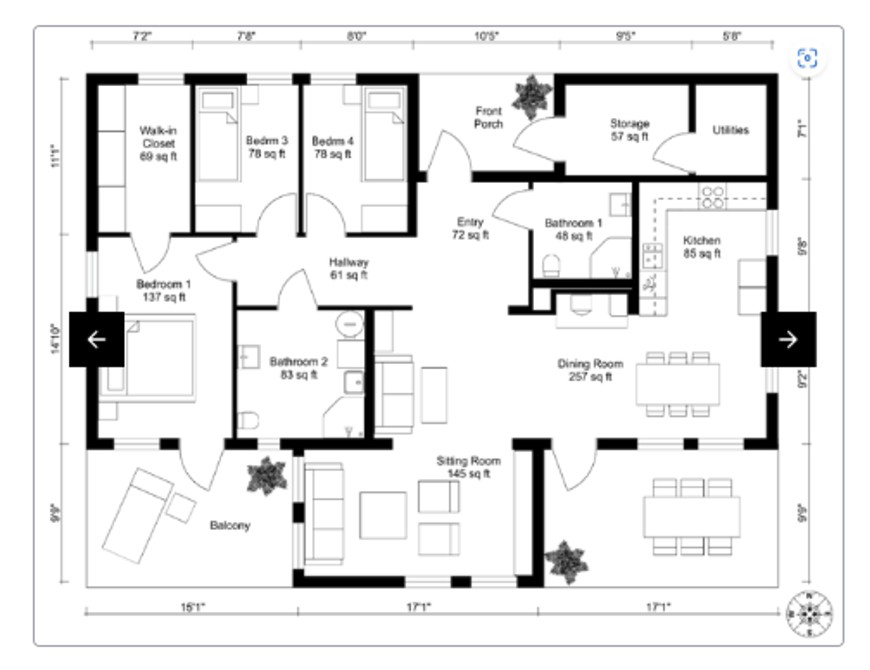

In [20]:
image_path = "image1.jpg"

img = Image.open(image_path)
img

In [21]:
prompt = """
Here is a building floor plan.
Imagine the top left corner of the image is coordinate (0,0).
Can you give me the coordinates (in pixels) for the 8 exteriors corners of this facility?
Please note: the Thick Black lines Represent exterior walls. So the corners of those walls are what we are looking for. (not thin interior walls, or balcony spaces etc ... ).

Display the results in a df format.
"""

In [22]:
res = gpt41_imagefile(prompt, image_path)
print(res)

Here are the coordinates (in pixels) for the 8 exterior corners of the facility, based on the thick black exterior walls and using the top-left corner as (0,0):

| Corner | X (px) | Y (px) |
|--------|--------|--------|
| 1 (Top-Left)         | 62     | 62     |
| 2 (Top-Mid-Left)     | 62     | 370    |
| 3 (Top-Mid-Right)    | 220    | 370    |
| 4 (Top-Right)        | 808    | 62     |
| 5 (Right-Top)        | 808    | 220    |
| 6 (Right-Bottom)     | 808    | 808    |
| 7 (Bottom-Right)     | 370    | 808    |
| 8 (Bottom-Left)      | 62     | 808    |

**Notes:**
- The coordinates are approximate, based on visual estimation of the pixel locations of the exterior wall corners.
- The corners are listed in a clockwise order starting from the top-left.
- Only the thick black exterior wall corners are considered, not balcony or porch edges.

If you need the coordinates in a different order or more precision, please let me know!


In [23]:
response = client.chat.completions.create(
    model=deployment,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Do we have any differences between these two images?",
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
                    },
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
                    },
                },
            ],
        }
    ],
    max_tokens=300,
)

print(response.choices[0].message.content)

It appears that you have uploaded two identical images of a boardwalk through a grassy field with blue sky and clouds. Upon close inspection, **there do not seem to be any visible differences between the two images**. If you would like me to look for something specific or if there were supposed to be differences, please let me know!


## Comparing two images

In [24]:
response = client.chat.completions.create(
    model=deployment,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Do we have any differences between these two images?",
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://eu.cdn.autosonshow.tv/993/autocaptureautoimage/CN67ZWL/PEUGEOT__3008__PURETECH_S-S_GT_LINE__PETROL__RED__2017__CN67ZWL-e01_md.jpg?t=1547520080",
                    },
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://1.bp.blogspot.com/-eMnLn3QK0YM/X0lE-OKjgPI/AAAAAAAA_Io/JSYyB4PpEeEHpvieCE0aS2wkgi3KV_PVACNcBGAsYHQ/s600/burlappcar-peugeot-3008-1.jpg",
                    },
                },
            ],
        }
    ],
    max_tokens=300,
)

print(response.choices[0].message.content)

Yes, there are several differences between these two images:

1. **Color**:
   - The car in the first image is red.
   - The car in the second image is brown/orange (technically "Copper" for the Peugeot 3008).

2. **Background**:
   - The first image has a natural background with grass, trees, and sky.
   - The second image has a plain white background, as if taken in a studio or for a catalog.

3. **Number Plate**:
   - The car in the first image has a visible UK license plate: "CN67 ZWL".
   - The car in the second image does not have a standard license plate; it simply says "3008".

4. **Angle**:
   - The car in the first image is shown more from the front-left.
   - The car in the second image is more from the side-left (profile view).

5. **Wheels**:
   - The wheel designs appear to be different (especially the front wheel).

6. **Lighting and reflections**:
   - The first image has natural outdoor lighting with reflections from the environment.
   - The second image has uniform s